# Data Analysis and Further Exploration!
Here I'll focus on analysis and exploration of the data. Our main goal is to build a Machine Learning model from scratch to predict the price of a new automobile.

To do so, I'll need a deeper understanding of the data at hand.

In [1]:
using Pkg; Pkg.add("CategoricalArrays")
using CategoricalArrays
using CSV
using DataFrames
using StatsPlots
using CairoMakie

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`


In [2]:
df = CSV.read("clean_data.csv", DataFrame)

Row,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
,Int64,Int64,String15,String7,String7,String7,String15,String3,String7,Float64,Float64,Float64,Float64,Int64,String7,String7,Int64,String7,Float64,Float64,Float64,Int64,Int64,Int64,Int64,Int64
1,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
2,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
3,1,158,audi,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.4,8.5,110,5500,19,25,17710
4,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.4,8.3,140,5500,17,20,23875
5,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,176.8,64.8,54.3,2395,ohc,four,108,mpfi,3.5,2.8,8.8,101,5800,23,29,16430
6,0,192,bmw,gas,std,four,sedan,rwd,front,101.2,176.8,64.8,54.3,2395,ohc,four,108,mpfi,3.5,2.8,8.8,101,5800,23,29,16925
7,0,188,bmw,gas,std,two,sedan,rwd,front,101.2,176.8,64.8,54.3,2710,ohc,six,164,mpfi,3.31,3.19,9.0,121,4250,21,28,20970
8,0,188,bmw,gas,std,four,sedan,rwd,front,101.2,176.8,64.8,54.3,2765,ohc,six,164,mpfi,3.31,3.19,9.0,121,4250,21,28,21105
9,2,121,chevrolet,gas,std,two,hatchback,fwd,front,88.4,141.1,60.3,53.2,1488,l,three,61,2bbl,2.91,3.03,9.5,48,5100,47,53,5151


# Analysing the data
We can separate our data into Categorical and Numeric.

I think that a good way to start is to create barplots for categorical data against price and correlation matrices for numeric data in order to understand it better.

I'll take just a subset of the whole Dataset for this purpose.

In [3]:
using Random

qty = Int(round(nrow(df)*0.6))

selectedrows = shuffle(1:nrow(df))[1:qty]

sample_set = df[selectedrows, :]

Row,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
,Int64,Int64,String15,String7,String7,String7,String15,String3,String7,Float64,Float64,Float64,Float64,Int64,String7,String7,Int64,String7,Float64,Float64,Float64,Int64,Int64,Int64,Int64,Int64
1,0,85,subaru,gas,std,four,wagon,4wd,front,96.9,173.6,65.4,54.9,2420,ohcf,four,108,2bbl,3.62,2.64,9.0,82,4800,23,29,8013
2,-2,103,volvo,gas,turbo,four,sedan,rwd,front,104.3,188.8,67.2,56.2,3045,ohc,four,130,mpfi,3.62,3.15,7.5,162,5100,17,22,18420
3,0,102,subaru,gas,std,four,sedan,4wd,front,97.0,172.0,65.4,54.3,2385,ohcf,four,108,2bbl,3.62,2.64,9.0,82,4800,24,25,9233
4,0,81,toyota,gas,std,four,wagon,4wd,front,95.7,169.7,63.6,59.1,2290,ohc,four,92,2bbl,3.05,3.03,9.0,62,4800,27,32,7898
5,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
6,1,113,mazda,gas,std,four,sedan,fwd,front,93.1,166.8,64.2,54.1,1950,ohc,four,91,2bbl,3.08,3.15,9.0,68,5000,31,38,7395
7,1,104,mazda,gas,std,two,hatchback,fwd,front,93.1,159.1,64.2,54.1,1890,ohc,four,91,2bbl,3.03,3.15,9.0,68,5000,30,31,5195
8,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
9,0,85,honda,gas,std,four,sedan,fwd,front,96.5,175.4,65.2,54.1,2304,ohc,four,110,1bbl,3.15,3.58,9.0,86,5800,27,33,8845


In [4]:
cat_cols = ["make", "fuel-type", "aspiration", "num-of-doors",
            "body-style", "drive-wheels", "engine-location",
            "engine-type", "fuel-system", "num-of-cylinders"]

cat_sample = select(sample_set, cat_cols, "price")
num_sample = select(sample_set, Not(cat_cols), "price")


Row,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
,Int64,Int64,Float64,Float64,Float64,Float64,Int64,Int64,Float64,Float64,Float64,Int64,Int64,Int64,Int64,Int64
1,0,85,96.9,173.6,65.4,54.9,2420,108,3.62,2.64,9.0,82,4800,23,29,8013
2,-2,103,104.3,188.8,67.2,56.2,3045,130,3.62,3.15,7.5,162,5100,17,22,18420
3,0,102,97.0,172.0,65.4,54.3,2385,108,3.62,2.64,9.0,82,4800,24,25,9233
4,0,81,95.7,169.7,63.6,59.1,2290,92,3.05,3.03,9.0,62,4800,27,32,7898
5,-1,95,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,16845
6,1,113,93.1,166.8,64.2,54.1,1950,91,3.08,3.15,9.0,68,5000,31,38,7395
7,1,104,93.1,159.1,64.2,54.1,1890,91,3.03,3.15,9.0,68,5000,30,31,5195
8,-1,95,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,19045
9,0,85,96.5,175.4,65.2,54.1,2304,110,3.15,3.58,9.0,86,5800,27,33,8845


## Categorical Data

In [5]:
first(cat_sample, 5)

Row,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,fuel-system,num-of-cylinders,price
,String15,String7,String7,String7,String15,String3,String7,String7,String7,String7,Int64
1,subaru,gas,std,four,wagon,4wd,front,ohcf,2bbl,four,8013
2,volvo,gas,turbo,four,sedan,rwd,front,ohc,mpfi,four,18420
3,subaru,gas,std,four,sedan,4wd,front,ohcf,2bbl,four,9233
4,toyota,gas,std,four,wagon,4wd,front,ohc,2bbl,four,7898
5,volvo,gas,std,four,sedan,rwd,front,ohc,mpfi,four,16845


### Grouping by Category

In [6]:
grp_make = groupby(cat_sample, "make")
grp_ftype = groupby(cat_sample, "fuel-type")
grp_asp = groupby(cat_sample, "aspiration")
grp_numd = groupby(cat_sample, "num-of-doors")
grp_bod = groupby(cat_sample, "body-style")
grp_drv = groupby(cat_sample, "drive-wheels")
grp_engloc = groupby(cat_sample, "engine-location")
grp_engtyp = groupby(cat_sample, "engine-type")
grp_fsys = groupby(cat_sample, "fuel-system")
grp_numcyl = groupby(cat_sample, "num-of-cylinders")

Row,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,fuel-system,num-of-cylinders,price
,String15,String7,String7,String7,String15,String3,String7,String7,String7,String7,Int64
1,subaru,gas,std,four,wagon,4wd,front,ohcf,2bbl,four,8013
2,volvo,gas,turbo,four,sedan,rwd,front,ohc,mpfi,four,18420
3,subaru,gas,std,four,sedan,4wd,front,ohcf,2bbl,four,9233
4,toyota,gas,std,four,wagon,4wd,front,ohc,2bbl,four,7898
5,volvo,gas,std,four,sedan,rwd,front,ohc,mpfi,four,16845
6,mazda,gas,std,four,sedan,fwd,front,ohc,2bbl,four,7395
7,mazda,gas,std,two,hatchback,fwd,front,ohc,2bbl,four,5195
8,volvo,gas,turbo,four,sedan,rwd,front,ohc,mpfi,four,19045
9,honda,gas,std,four,sedan,fwd,front,ohc,1bbl,four,8845


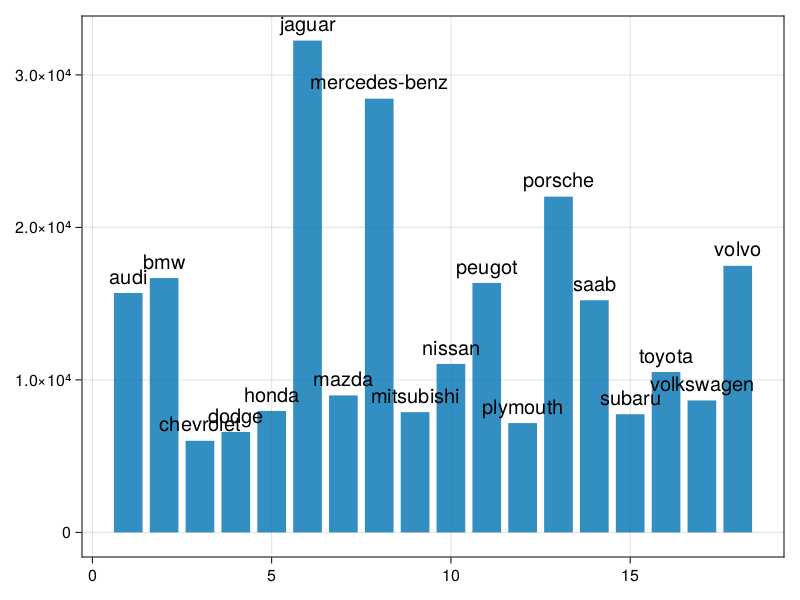

In [7]:
using Statistics
plot_data = combine(grp_make, :price => mean)

x = 1:nrow(plot_data)
height = plot_data[:, :price_mean]
labels = plot_data[:, :make]

barplot(x, height, bar_labels=labels)


So, yeah, there are manufacturers with more expensive cars than others.

In [8]:
combine(grp_ftype, :price => mean)

Row,fuel-type,price_mean
,String7,Float64
1,gas,11052.3
2,diesel,16844.5


In average, diesel cars cost more... but is this accurate?

In [9]:
combine(grp_ftype, :price => mean, :price => std, :price => extrema)

Row,fuel-type,price_mean,price_std,price_extrema
,String7,Float64,Float64,Tuple…
1,gas,11052.3,5243.75,"(5118, 32250)"
2,diesel,16844.5,8853.63,"(7099, 31600)"


The price ranges look pretty similar and prices tend to vary a lot. I don't think I'll be taking this feature into consideration.

In [10]:
droppedfeats = ["fuel-type"]

1-element Vector{String}:
 "fuel-type"

In [11]:
combine(grp_asp, :price => mean, :price => std, :price => extrema)

Row,aspiration,price_mean,price_std,price_extrema
,String7,Float64,Float64,Tuple…
1,std,10337.7,4841.48,"(5118, 32250)"
2,turbo,17326.8,6950.71,"(7689, 31600)"


It's very similar to the fuel-type feature...

In [12]:
push!(droppedfeats, "aspiration")

2-element Vector{String}:
 "fuel-type"
 "aspiration"

In [13]:
combine(grp_numd, :price => mean, :price => std, :price => extrema)

Row,num-of-doors,price_mean,price_std,price_extrema
,String7,Float64,Float64,Tuple…
1,four,12594.5,6154.98,"(6229, 32250)"
2,two,10485.2,5502.1,"(5118, 28176)"


In [14]:
push!(droppedfeats, "num-of-doors")

3-element Vector{String}:
 "fuel-type"
 "aspiration"
 "num-of-doors"

In [15]:
plot_data = combine(grp_bod, :price => mean, :price => std, :price => extrema)

Row,body-style,price_mean,price_std,price_extrema
,String15,Float64,Float64,Tuple…
1,sedan,13222.1,6341.86,"(6575, 32250)"
2,hatchback,9788.94,4842.27,"(5118, 22018)"
3,wagon,9042.12,3092.59,"(6918, 16515)"
4,hardtop,14315.8,9318.41,"(8249, 28176)"
5,convertible,17669.0,NaN,"(17669, 17669)"


Ok, now here we have something more interesting!
Depending on the body style, the price does change

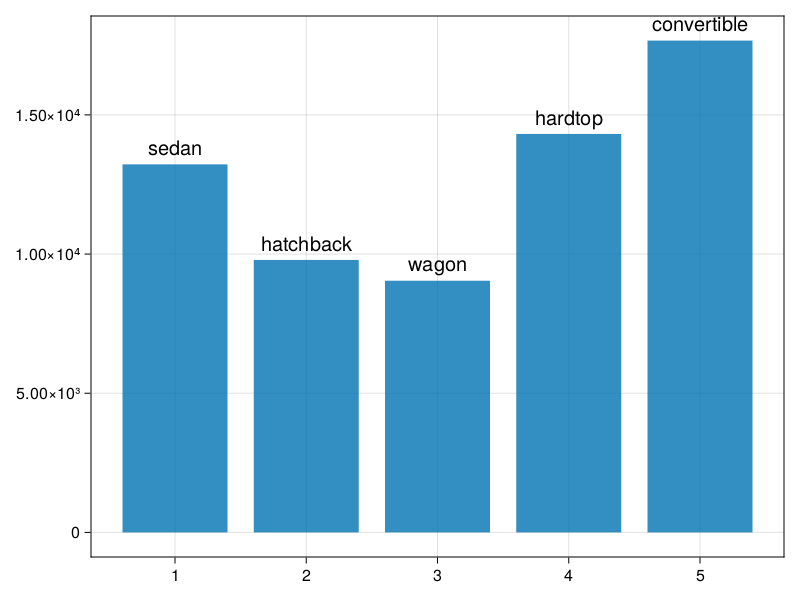

In [16]:
x = 1:nrow(plot_data)
height = plot_data[:, "price_mean"]
labels = plot_data[:, "body-style"]

barplot(x, height, bar_labels=labels)

Great, we have another useful feature then!

In [17]:
plot_data = combine(grp_drv, :price => mean, :price => std, :price => extrema)

Row,drive-wheels,price_mean,price_std,price_extrema
,String3,Float64,Float64,Tuple…
1,fwd,8553.88,2990.28,"(5118, 18620)"
2,4wd,10274.4,4048.89,"(7898, 17450)"
3,rwd,18109.5,5527.11,"(9639, 32250)"


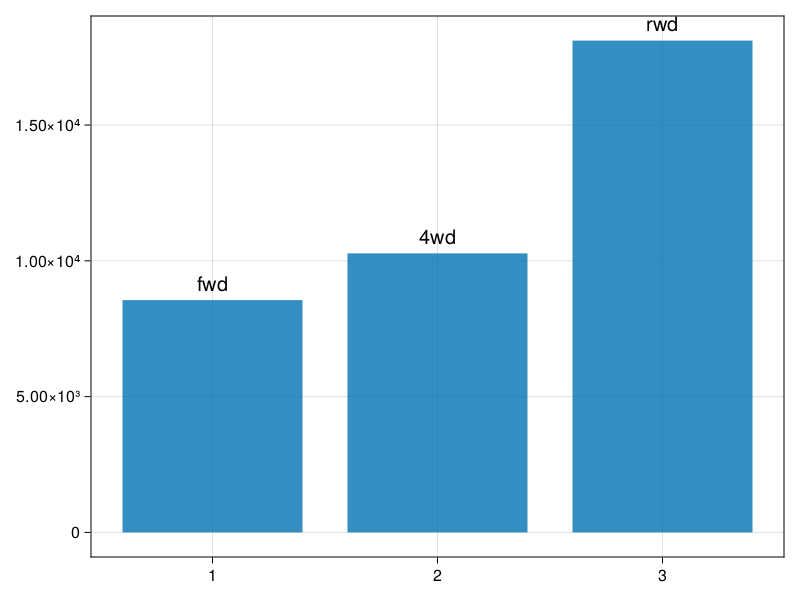

In [18]:
# Another useful feature!
x = 1:nrow(plot_data)
height = plot_data[:, "price_mean"]
labels = plot_data[:, "drive-wheels"]

barplot(x, height, bar_labels=labels)

It looks like the Rear-wheel drive cars are quite more expensive than the rest of the cars! Is that right?

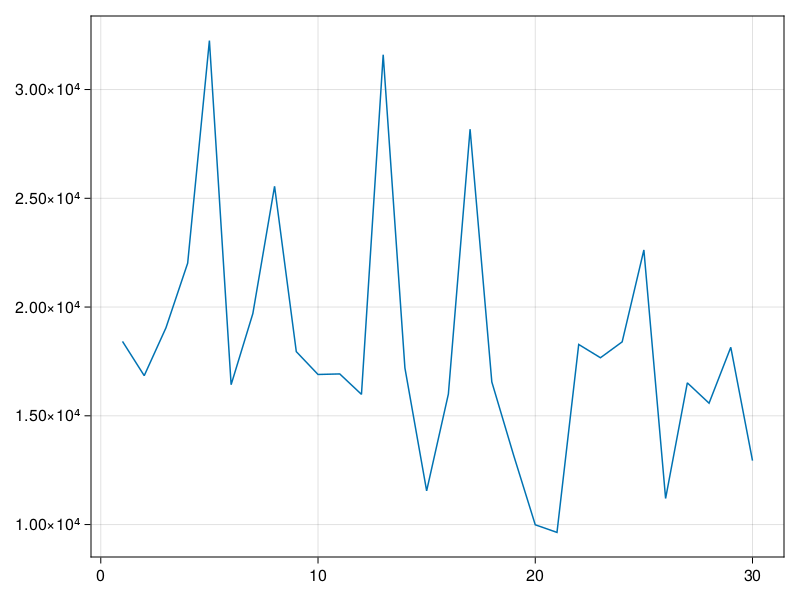

In [19]:
rwd_grp = grp_drv[3]

x= 1:nrow(rwd_grp)
y = rwd_grp[:, :price]
lines(x, y)

Actually, it looks more like there are some extreme values pushing the mean prices.

In [20]:
describe(rwd_grp[:, :price])

Summary Stats:
Length:         30
Missing Count:  0
Mean:           18109.466667
Minimum:        9639.000000
1st Quartile:   15988.250000
Median:         17062.000000
3rd Quartile:   18888.750000
Maximum:        32250.000000
Type:           Int64


In [21]:
push!(droppedfeats, "drive-wheels")

4-element Vector{String}:
 "fuel-type"
 "aspiration"
 "num-of-doors"
 "drive-wheels"

In [22]:
combine(grp_engloc, :price => mean, :price => std, :price => extrema)

Row,engine-location,price_mean,price_std,price_extrema
,String7,Float64,Float64,Tuple…
1,front,11662.0,5938.88,"(5118, 32250)"


Well, there's only one possible value, so it really won't affect the price of the car (or at least I cannot tell from this dataset).

In [23]:
push!(droppedfeats, "engine-location")

5-element Vector{String}:
 "fuel-type"
 "aspiration"
 "num-of-doors"
 "drive-wheels"
 "engine-location"

In [24]:
plot_data = combine(grp_engtyp, :price => mean, :price => std, :price => extrema, :price)

Row,engine-type,price_mean,price_std,price_extrema,price
,String7,Float64,Float64,Tuple…,Int64
1,ohc,10901.1,5572.94,"(5195, 31600)",18420
2,ohc,10901.1,5572.94,"(5195, 31600)",7898
3,ohc,10901.1,5572.94,"(5195, 31600)",16845
4,ohc,10901.1,5572.94,"(5195, 31600)",7395
5,ohc,10901.1,5572.94,"(5195, 31600)",5195
6,ohc,10901.1,5572.94,"(5195, 31600)",19045
7,ohc,10901.1,5572.94,"(5195, 31600)",8845
8,ohc,10901.1,5572.94,"(5195, 31600)",5399
9,ohc,10901.1,5572.94,"(5195, 31600)",7999


In [25]:
using CategoricalArrays
newcol = categorical(cat_sample[:, "engine-type"])

addedcat =  cat_sample[:, :]
addedcat[:, "cat_engtype"] = newcol
first(addedcat, 5)

Row,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,fuel-system,num-of-cylinders,price,cat_engtype
,String15,String7,String7,String7,String15,String3,String7,String7,String7,String7,Int64,Cat…
1,subaru,gas,std,four,wagon,4wd,front,ohcf,2bbl,four,8013,ohcf
2,volvo,gas,turbo,four,sedan,rwd,front,ohc,mpfi,four,18420,ohc
3,subaru,gas,std,four,sedan,4wd,front,ohcf,2bbl,four,9233,ohcf
4,toyota,gas,std,four,wagon,4wd,front,ohc,2bbl,four,7898,ohc
5,volvo,gas,std,four,sedan,rwd,front,ohc,mpfi,four,16845,ohc


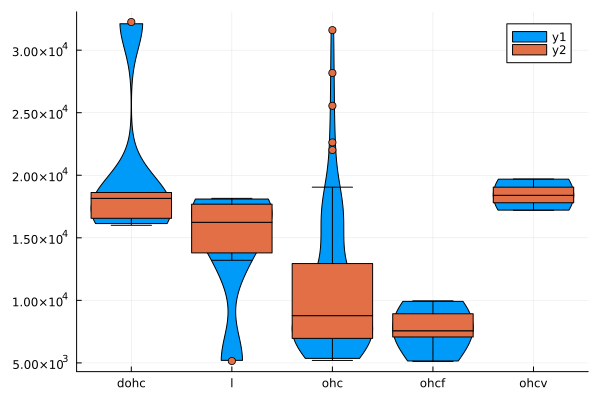

In [26]:
@df addedcat StatsPlots.violin(string.(:cat_engtype), :price)
@df addedcat StatsPlots.boxplot!(string.(:cat_engtype), :price)

There are certainly some differences in price depending on the engine type.

In [27]:
combine(grp_fsys, :price => mean, :price => std, :price => extrema)

Row,fuel-system,price_mean,price_std,price_extrema
,String7,Float64,Float64,Tuple…
1,mpfi,15006.8,4805.15,"(7957, 32250)"
2,2bbl,7074.58,1231.64,"(5118, 10245)"
3,1bbl,7253.0,1323.2,"(5399, 9095)"
4,idi,16844.5,8853.63,"(7099, 31600)"
5,spdi,8308.33,851.235,"(7689, 9279)"


In [28]:
using CategoricalArrays
newcol = categorical(cat_sample[:, "fuel-system"])

addedcat =  cat_sample[:, :]
addedcat[:, "cat_fsystem"] = newcol
first(addedcat, 5)

Row,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,fuel-system,num-of-cylinders,price,cat_fsystem
,String15,String7,String7,String7,String15,String3,String7,String7,String7,String7,Int64,Cat…
1,subaru,gas,std,four,wagon,4wd,front,ohcf,2bbl,four,8013,2bbl
2,volvo,gas,turbo,four,sedan,rwd,front,ohc,mpfi,four,18420,mpfi
3,subaru,gas,std,four,sedan,4wd,front,ohcf,2bbl,four,9233,2bbl
4,toyota,gas,std,four,wagon,4wd,front,ohc,2bbl,four,7898,2bbl
5,volvo,gas,std,four,sedan,rwd,front,ohc,mpfi,four,16845,mpfi


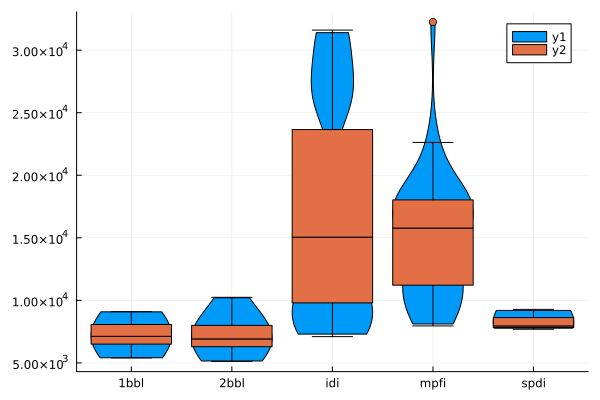

In [29]:
@df addedcat StatsPlots.violin(string.(:cat_fsystem), :price)
@df addedcat StatsPlots.boxplot!(string.(:cat_fsystem), :price)

I'll keep in mind this feature.

In [30]:
using CategoricalArrays
newcol = categorical(cat_sample[:, "num-of-cylinders"])

addedcat =  cat_sample[:, :]
addedcat[:, "cat_ncyl"] = newcol
first(addedcat, 5)

Row,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,fuel-system,num-of-cylinders,price,cat_ncyl
,String15,String7,String7,String7,String15,String3,String7,String7,String7,String7,Int64,Cat…
1,subaru,gas,std,four,wagon,4wd,front,ohcf,2bbl,four,8013,four
2,volvo,gas,turbo,four,sedan,rwd,front,ohc,mpfi,four,18420,four
3,subaru,gas,std,four,sedan,4wd,front,ohcf,2bbl,four,9233,four
4,toyota,gas,std,four,wagon,4wd,front,ohc,2bbl,four,7898,four
5,volvo,gas,std,four,sedan,rwd,front,ohc,mpfi,four,16845,four


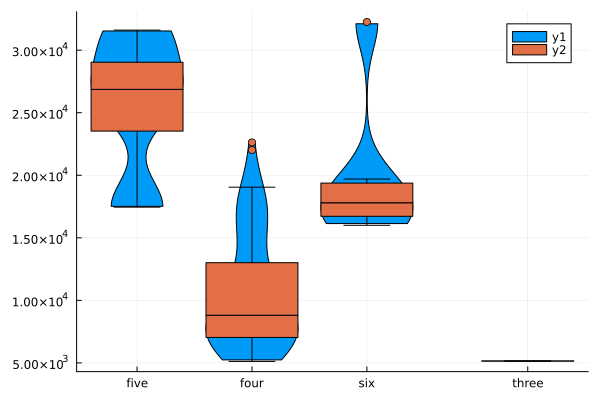

In [31]:
@df addedcat StatsPlots.violin(string.(:cat_ncyl), :price)
@df addedcat StatsPlots.boxplot!(string.(:cat_ncyl), :price)

That's all for now, I've got my categorical features!

In [32]:
select(sample_set, Not(droppedfeats))

Row,symboling,normalized-losses,make,body-style,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
,Int64,Int64,String15,String15,Float64,Float64,Float64,Float64,Int64,String7,String7,Int64,String7,Float64,Float64,Float64,Int64,Int64,Int64,Int64,Int64
1,0,85,subaru,wagon,96.9,173.6,65.4,54.9,2420,ohcf,four,108,2bbl,3.62,2.64,9.0,82,4800,23,29,8013
2,-2,103,volvo,sedan,104.3,188.8,67.2,56.2,3045,ohc,four,130,mpfi,3.62,3.15,7.5,162,5100,17,22,18420
3,0,102,subaru,sedan,97.0,172.0,65.4,54.3,2385,ohcf,four,108,2bbl,3.62,2.64,9.0,82,4800,24,25,9233
4,0,81,toyota,wagon,95.7,169.7,63.6,59.1,2290,ohc,four,92,2bbl,3.05,3.03,9.0,62,4800,27,32,7898
5,-1,95,volvo,sedan,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
6,1,113,mazda,sedan,93.1,166.8,64.2,54.1,1950,ohc,four,91,2bbl,3.08,3.15,9.0,68,5000,31,38,7395
7,1,104,mazda,hatchback,93.1,159.1,64.2,54.1,1890,ohc,four,91,2bbl,3.03,3.15,9.0,68,5000,30,31,5195
8,-1,95,volvo,sedan,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
9,0,85,honda,sedan,96.5,175.4,65.2,54.1,2304,ohc,four,110,1bbl,3.15,3.58,9.0,86,5800,27,33,8845


In [33]:
CSV.write("relevant_categories.csv", select(df, Not(droppedfeats)))

"relevant_categories.csv"